In [34]:
import pandas as pd
import numpy as np
import math
import scipy as sci
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
import statsmodels

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model

# Part I: Getting the Data

In [35]:
vix = pdr.DataReader("^VIX", data_source = 'yahoo')
vxtyn = pd.read_excel("VXTYN.xls")

In [72]:
vix["Change in VIX"] = (vix["Adj Close"]/vix["Adj Close"].shift(1))-1
vix = vix.dropna()
vxtyn['Change in VXTYN'] = (vxtyn["VXTYN"]/vxtyn["VXTYN"].shift(1))-1
vxtyn = vxtyn.dropna()


# Part II: Visualization

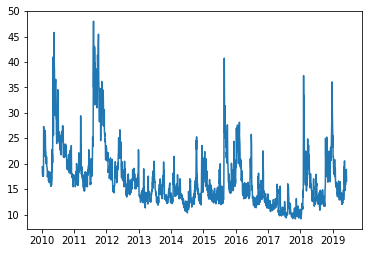

In [37]:
plt.plot(vix["Adj Close"])

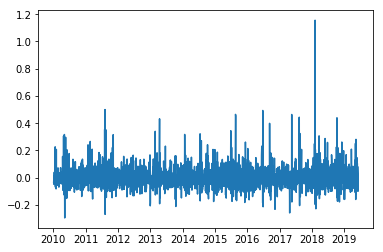

In [38]:
plt.plot(vix["Change"])

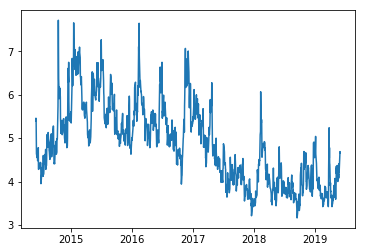

In [39]:
plt.plot(vxtyn["Date"],vxtyn["VXTYN"])

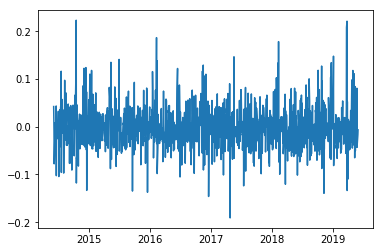

In [40]:
plt.plot(vxtyn["Date"],vxtyn["Change"])

# Part III: Testing

In [41]:
vixdf = statsmodels.tsa.stattools.adfuller(vix['Adj Close'])
vixdf
# The test statistic shown shows the VIX is stationary at a 1% level!

(-4.581512993115619,
 0.00013969273033585534,
 10,
 2359,
 {'1%': -3.433125086901646,
  '5%': -2.8627659864448662,
  '10%': -2.5674226455102995},
 8869.955116114472)

In [42]:
vxtyndf = statsmodels.tsa.stattools.adfuller(vxtyn["VXTYN"])
vxtyndf
# The 10-year Treasury Note VIX is stationary at a 5% level, but not at 1!

(-3.189194374624204,
 0.02061873321617493,
 6,
 1205,
 {'1%': -3.4357884107845953,
  '5%': -2.863941528023427,
  '10%': -2.56804861503762},
 -93.2641655617208)

In [43]:
#Double check with KPSS
vixkpss = statsmodels.tsa.stattools.kpss(vix['Adj Close'])
vixkpss


C:\Users\torre\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(2.439477123479441,
 0.01,
 27,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [44]:
vxtynkpss = statsmodels.tsa.stattools.kpss(vxtyn["VXTYN"])
vxtynkpss


C:\Users\torre\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(3.210492206375553,
 0.01,
 23,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# Part IV: ARMA

In [74]:
vixs = vix["Adj Close"]
vxtyns = vxtyn["VXTYN"]
vixd = vix["Change in VIX"]
vxtd = vxtyn["Change in VXTYN"]
vixd = vixd.dropna()
vxtd = vxtd.dropna()

In [45]:
po = statsmodels.tsa.arima_model.ARIMA(vixs, order = (1,1,1))
po2 = po.fit()
po2.summary()

C:\Users\torre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\torre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 2368
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4490.575
Method:                       css-mle   S.D. of innovations              1.612
Date:                Wed, 05 Jun 2019   AIC                           8989.150
Time:                        10:47:43   BIC                           9012.229
Sample:                             1   HQIC                          8997.552
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0013      0.015     -0.087      0.930      -0.031       0.029
ar.L1.D.Adj Close     0.8054      0.041     19.859      0.000       0.726       0.885
ma.L1.D.Adj Close    -0.9104      0.029    -30.970      0.000      -0.968      -0.853
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2416           +0.0000j            1.2416            0.0000
MA.1            1.0985           +0.0000j            1.0985            0.0000
-----------------------------------------------------------------------------
"""

In [46]:
po = statsmodels.tsa.arima_model.ARIMA(vxtyns, order = (1,1,1))
po2 = po.fit()
po2.summary()

C:\Users\torre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\torre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.VXTYN   No. Observations:                 1256
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  67.691
Method:                       css-mle   S.D. of innovations              0.229
Date:                Wed, 05 Jun 2019   AIC                           -127.382
Time:                        10:47:44   BIC                           -106.839
Sample:                             1   HQIC                          -119.661
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0007      0.001     -0.472      0.637      -0.003       0.002
ar.L1.D.VXTYN     0.9008      0.022     41.323      0.000       0.858       0.944
ma.L1.D.VXTYN    -0.9792      0.011    -87.088      0.000      -1.001      -0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1101           +0.0000j            1.1101            0.0000
MA.1            1.0213           +0.0000j            1.0213            0.0000
-----------------------------------------------------------------------------
"""

# Part V: ARCH

In [48]:
vixshift = [vixs[i-1] for i in range(1, 2369)]
a = vxtyns.reset_index()
vxtshift = [a["VXTYN"][i-1] for i in range(1, len(vxtyns))]

In [88]:
n_test = 200
train, test = vixd[:-n_test], vixd[-n_test:]
model = arch_model(train, mean='Zero', vol='ARCH', p=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -2504.9451206186213
Iteration:      2,   Func. Count:     15,   Neg. LLF: -2505.3585713292177
Iteration:      3,   Func. Count:     22,   Neg. LLF: -2511.2698881843007
Iteration:      4,   Func. Count:     29,   Neg. LLF: -2511.9175299431217
Iteration:      5,   Func. Count:     36,   Neg. LLF: -2512.618054363621
Iteration:      6,   Func. Count:     44,   Neg. LLF: -2513.2692024243356
Iteration:      7,   Func. Count:     51,   Neg. LLF: -2513.9421618298416
Iteration:      8,   Func. Count:     58,   Neg. LLF: -2513.9766679639383
Iteration:      9,   Func. Count:     64,   Neg. LLF: -2514.020508207798
Iteration:     10,   Func. Count:     70,   Neg. LLF: -2514.026223145468
Iteration:     11,   Func. Count:     76,   Neg. LLF: -2514.0262325567087
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2514.0262325566196
            Iterations: 11
            Function evaluations: 76
            Gr

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:          Change in VIX   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2514.03
Distribution:                  Normal   AIC:                          -5020.05
Method:            Maximum Likelihood   BIC:                          -4997.32
                                        No. Observations:                 2169
Date:                Wed, Jun 05 2019   Df Residuals:                     2165
Time:                        12:11:33   Df Model:                            4
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.8306e-03  4.473e-04      8.563  1.098e-17 [2.954e-03,4.707e-03]
alpha[1]       0.2350  9.549e-02      2.461  1.385e-02   [4.786e-02,  0.422]
alpha[2]       0.1333  4.550e-02      2.930  3.394e-03   [4.412e-02,  0.222]
alpha[3]       0.0743  4.012e-02      1.852  6.401e-02  [-4.326e-03,  0.153]
============================================================================

Covariance estimator: robust
"""

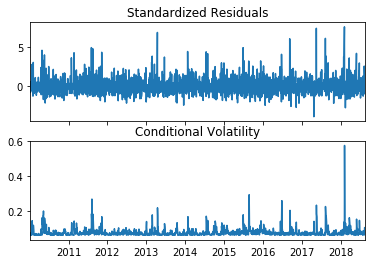

In [50]:
p1 = model_fit.plot()

In [89]:
n_test = 200
train, test = vxtd[:-n_test], vxtd[-n_test:]
model2 = arch_model(train, mean='Zero', vol='ARCH', p=3)
model_fit2 = model2.fit()
model_fit2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -1713.104897293054
Iteration:      2,   Func. Count:     15,   Neg. LLF: -1713.1114207214
Iteration:      3,   Func. Count:     23,   Neg. LLF: -1713.3935149134581
Iteration:      4,   Func. Count:     30,   Neg. LLF: -1713.5011274347146
Iteration:      5,   Func. Count:     37,   Neg. LLF: -1713.5830677131212
Iteration:      6,   Func. Count:     45,   Neg. LLF: -1713.5846545370528
Iteration:      7,   Func. Count:     52,   Neg. LLF: -1713.5922853907493
Iteration:      8,   Func. Count:     59,   Neg. LLF: -1713.5924308259778
Iteration:      9,   Func. Count:     65,   Neg. LLF: -1713.5925607685167
Iteration:     10,   Func. Count:     71,   Neg. LLF: -1713.5925760586974
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1713.5925760587024
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:        Change in VXTYN   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:                1713.59
Distribution:                  Normal   AIC:                          -3419.19
Method:            Maximum Likelihood   BIC:                          -3399.51
                                        No. Observations:                 1011
Date:                Wed, Jun 05 2019   Df Residuals:                     1007
Time:                        12:11:36   Df Model:                            4
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.6282e-03  1.648e-04      9.878  5.177e-23 [1.305e-03,1.951e-03]
alpha[1]       0.0926  5.036e-02      1.839  6.597e-02  [-6.109e-03,  0.191]
alpha[2]       0.0526  5.207e-02      1.010      0.312  [-4.946e-02,  0.155]
alpha[3]       0.0501  3.545e-02      1.414      0.157  [-1.937e-02,  0.120]
============================================================================

Covariance estimator: robust
"""

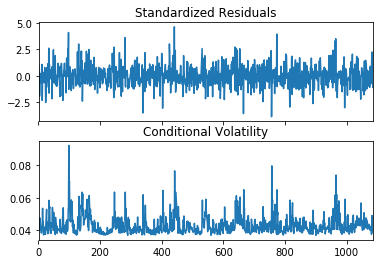

In [52]:
p2 = model_fit2.plot()

# Part VI: GARCH

In [86]:
n_test = 200
train, test = vixd[:-n_test], vixd[-n_test:]
model3 = arch_model(train, mean='Zero', vol='GARCH', p=10)
model_fit3 = model3.fit()
model_fit3.summary()

Iteration:      1,   Func. Count:     14,   Neg. LLF: -2443.8785240827547
Iteration:      2,   Func. Count:     29,   Neg. LLF: -2507.8361353500104
Iteration:      3,   Func. Count:     45,   Neg. LLF: -2508.817045433946
Iteration:      4,   Func. Count:     60,   Neg. LLF: -2523.7028455932295
Iteration:      5,   Func. Count:     76,   Neg. LLF: -2523.996932534396
Iteration:      6,   Func. Count:     92,   Neg. LLF: -2524.19459524098
Iteration:      7,   Func. Count:    107,   Neg. LLF: -2526.168450564981
Iteration:      8,   Func. Count:    123,   Neg. LLF: -2526.2426073839597
Iteration:      9,   Func. Count:    138,   Neg. LLF: -2527.222426522204
Iteration:     10,   Func. Count:    154,   Neg. LLF: -2527.2893061447576
Iteration:     11,   Func. Count:    169,   Neg. LLF: -2527.534570538196
Iteration:     12,   Func. Count:    184,   Neg. LLF: -2527.673113131895
Iteration:     13,   Func. Count:    199,   Neg. LLF: -2527.962650784163
Iteration:     14,   Func. Count:    214,   Neg

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:          Change in VIX   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2529.38
Distribution:                  Normal   AIC:                          -5034.76
Method:            Maximum Likelihood   BIC:                          -4966.57
                                        No. Observations:                 2169
Date:                Wed, Jun 05 2019   Df Residuals:                     2157
Time:                        12:10:46   Df Model:                           12
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.4011e-03  2.393e-03      1.421      0.155 [-1.290e-03,8.092e-03]
alpha[1]       0.2264  8.982e-02      2.520  1.172e-02    [5.034e-02,  0.402]
alpha[2]       0.1133      0.166      0.684      0.494      [ -0.211,  0.438]
alpha[3]       0.0409  8.049e-02      0.508      0.612      [ -0.117,  0.199]
alpha[4]   4.7456e-03  4.504e-02      0.105      0.916 [-8.352e-02,9.301e-02]
alpha[5]       0.0260  2.581e-02      1.006      0.314 [-2.462e-02,7.656e-02]
alpha[6]   3.9528e-03  2.794e-02      0.141      0.887 [-5.080e-02,5.871e-02]
alpha[7]       0.0162  2.397e-02      0.675      0.500 [-3.080e-02,6.317e-02]
alpha[8]       0.0335  4.018e-02      0.833      0.405   [-4.527e-02,  0.112]
alpha[9]       0.0000      0.104      0.000      1.000      [ -0.204,  0.204]
alpha[10]      0.0310  1.639e-02      1.893  5.837e-02 [-1.099e-03,6.315e-02]
beta[1]        0.0000      0.717      0.000      1.000      [ -1.405,  1.405]
=============================================================================

Covariance estimator: robust
"""

In [87]:
n_test = 200
train, test = vxtd[:-n_test], vxtd[-n_test:]
model4 = arch_model(train, mean='Zero', vol='GARCH', p=10)
model_fit4 = model4.fit()
model_fit4.summary()

Iteration:      1,   Func. Count:     14,   Neg. LLF: -1709.9568899141907
Iteration:      2,   Func. Count:     31,   Neg. LLF: -1710.0157443847663
Iteration:      3,   Func. Count:     46,   Neg. LLF: -1713.2849322702962
Iteration:      4,   Func. Count:     62,   Neg. LLF: -1713.41665834163
Iteration:      5,   Func. Count:     77,   Neg. LLF: -1714.6480786062277
Iteration:      6,   Func. Count:     93,   Neg. LLF: -1714.9780536764874
Iteration:      7,   Func. Count:    108,   Neg. LLF: -1715.9574965819288
Iteration:      8,   Func. Count:    123,   Neg. LLF: -1716.4802947194662
Iteration:      9,   Func. Count:    138,   Neg. LLF: -1716.8944438976087
Iteration:     10,   Func. Count:    153,   Neg. LLF: -1717.5330267422241
Iteration:     11,   Func. Count:    168,   Neg. LLF: -1718.3066609738885
Iteration:     12,   Func. Count:    182,   Neg. LLF: -1718.7766923871386
Iteration:     13,   Func. Count:    196,   Neg. LLF: -1718.8460093981382
Iteration:     14,   Func. Count:    210

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:        Change in VXTYN   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                1718.87
Distribution:                  Normal   AIC:                          -3413.73
Method:            Maximum Likelihood   BIC:                          -3354.71
                                        No. Observations:                 1011
Date:                Wed, Jun 05 2019   Df Residuals:                      999
Time:                        12:11:12   Df Model:                           12
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3736e-03  5.262e-03      0.261      0.794 [-8.940e-03,1.169e-02]
alpha[1]       0.1037  5.547e-02      1.869  6.164e-02   [-5.053e-03,  0.212]
alpha[2]       0.0344      0.416  8.255e-02      0.934      [ -0.782,  0.851]
alpha[3]       0.0319  6.568e-02      0.486      0.627   [-9.680e-02,  0.161]
alpha[4]   3.5413e-13      0.490  7.226e-13      1.000      [ -0.961,  0.961]
alpha[5]       0.0000      0.145      0.000      1.000      [ -0.284,  0.284]
alpha[6]       0.0000      0.414      0.000      1.000      [ -0.811,  0.811]
alpha[7]       0.0000      0.179      0.000      1.000      [ -0.351,  0.351]
alpha[8]       0.0666  6.459e-02      1.031      0.303   [-6.001e-02,  0.193]
alpha[9]       0.0949      0.493      0.193      0.847      [ -0.871,  1.061]
alpha[10]      0.0000      0.315      0.000      1.000      [ -0.618,  0.618]
beta[1]        0.0000      3.587      0.000      1.000      [ -7.031,  7.031]
=============================================================================

Covariance estimator: robust
"""

# Part VII: Vector Autoregression

In [55]:
# Build a VAR model & do impulse reponse
# Look at the options' pricing, maybe?
vxtyn = vxtyn.set_index(vxtyn['Date'])
a = pd.DataFrame(vxtyn['VXTYN'])
b = pd.merge(a,vix, how='inner', left_index=True, right_index=True)
data = [b["VXTYN"], b["Adj Close"]]
data = pd.DataFrame(data)
data = data.T

In [56]:
model = VAR(data)
results = model.fit(1)
results.summary()

C:\Users\torre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Jun, 2019
Time:                     10:47:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.24742
Nobs:                     1211.00    HQIC:                  -2.26317
Log likelihood:          -2054.56    FPE:                   0.103035
AIC:                     -2.27269    Det(Omega_mle):        0.102526
--------------------------------------------------------------------
Results for equation VXTYN
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.158763         0.038591            4.114           0.000
L1.VXTYN             0.965453         0.007813          123.576           0.000
L1.Adj Close         0.000576         0.001654            0.348 

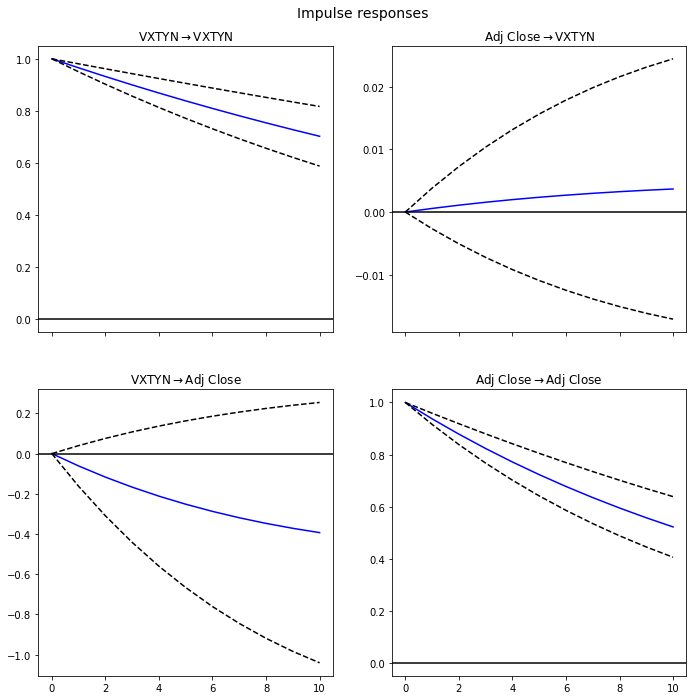

In [57]:
irf = results.irf(10)
p3 = irf.plot(orth = False)

In [82]:
vxtyn = vxtyn.set_index(vxtyn['Date'])
c = pd.DataFrame(vxtyn['Change in VXTYN'])
d = pd.merge(c,vix, how='inner', left_index=True, right_index=True)
data = [d["Change in VXTYN"], b["Change in VIX"]]
data = pd.DataFrame(data)
data = data.T

model2 = VAR(data)
results2 = model2.fit(1)
results2.summary()

C:\Users\torre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Jun, 2019
Time:                     10:52:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.1749
Nobs:                     1210.00    HQIC:                  -11.1906
Log likelihood:           3348.25    FPE:                1.36724e-05
AIC:                     -11.2001    Det(Omega_mle):     1.36048e-05
--------------------------------------------------------------------
Results for equation Change in VXTYN
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.000895         0.001331            0.672           0.501
L1.Change in VXTYN        -0.074970         0.032039           -2.340           0.019
L1.Change in VIX           0.0

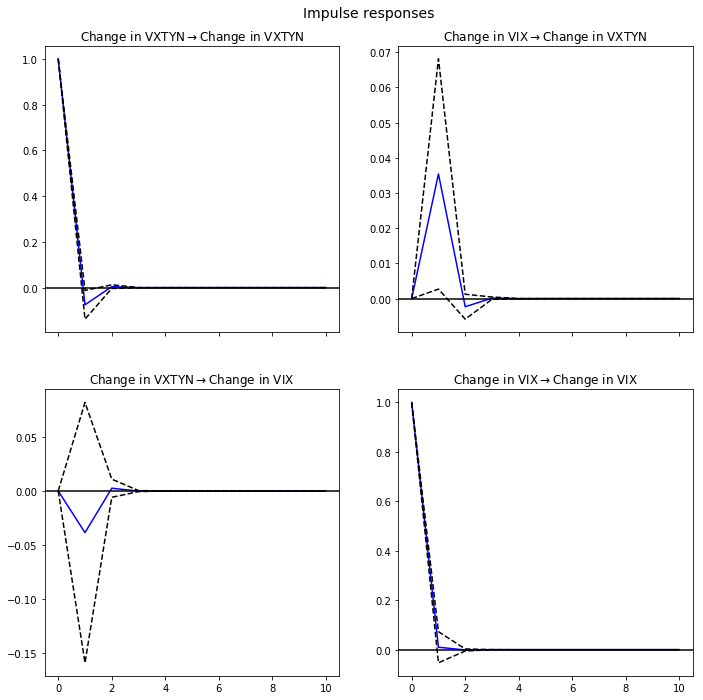

In [84]:
irf = results2.irf(10)
p3 = irf.plot(orth = False)

# Part VIII: Ambition

In [58]:
n_test = 200
train, test = vixd[:-n_test], vixd[-n_test:]
model = arch_model(train, mean='Zero', vol='ARCH', p=3)
model_fit5 = model.fit()
model_fit5.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -2506.636656869374
Iteration:      2,   Func. Count:     15,   Neg. LLF: -2507.046173804523
Iteration:      3,   Func. Count:     22,   Neg. LLF: -2512.969931807982
Iteration:      4,   Func. Count:     29,   Neg. LLF: -2513.614784497379
Iteration:      5,   Func. Count:     36,   Neg. LLF: -2514.31163964233
Iteration:      6,   Func. Count:     44,   Neg. LLF: -2514.9664800231794
Iteration:      7,   Func. Count:     51,   Neg. LLF: -2515.6404419129312
Iteration:      8,   Func. Count:     58,   Neg. LLF: -2515.67409305373
Iteration:      9,   Func. Count:     64,   Neg. LLF: -2515.7178883520755
Iteration:     10,   Func. Count:     70,   Neg. LLF: -2515.723542205657
Iteration:     11,   Func. Count:     76,   Neg. LLF: -2515.723551404736
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2515.7235514046474
            Iterations: 11
            Function evaluations: 76
            Gradient 

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                 Change   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2515.72
Distribution:                  Normal   AIC:                          -5023.45
Method:            Maximum Likelihood   BIC:                          -5000.72
                                        No. Observations:                 2170
Date:                Wed, Jun 05 2019   Df Residuals:                     2166
Time:                        10:47:51   Df Model:                            4
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.8276e-03  4.471e-04      8.560  1.125e-17 [2.951e-03,4.704e-03]
alpha[1]       0.2351  9.550e-02      2.462  1.380e-02   [4.797e-02,  0.422]
alpha[2]       0.1335  4.554e-02      2.931  3.380e-03   [4.421e-02,  0.223]
alpha[3]       0.0743  4.011e-02      1.853  6.382e-02  [-4.273e-03,  0.153]
============================================================================

Covariance estimator: robust
"""

In [59]:
x = model_fit5.forecast(horizon = 30)
x.variance.tail(1)
vixpredvar = x.variance.tail(1)
vixpredvar.values

array([[0.00744922, 0.00720332, 0.00700676, 0.00699033, 0.00694195,
        0.00691376, 0.00689946, 0.00688874, 0.00688221, 0.00687818,
        0.00687557, 0.00687393, 0.00687289, 0.00687224, 0.00687182,
        0.00687156, 0.0068714 , 0.00687129, 0.00687123, 0.00687118,
        0.00687116, 0.00687114, 0.00687113, 0.00687112, 0.00687112,
        0.00687112, 0.00687112, 0.00687111, 0.00687111, 0.00687111]])

In [60]:
vixpredmean = x.mean.tail(1)
vixpredmean.values

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [61]:
# Assume the distribution of the change in VIX level is Normal. 
# Thus, for any of our forecasted time-steps, the vix-level change is ~N(0, var at time i)
d = np.zeros((30, 100))

for j in range(100):
    for i in range(30):
        s = np.random.normal(0, vixpredvar.iloc[0,i])
        d[i, j] = s

In [62]:
e = pd.DataFrame(data = d[0:, 0:])
# e represents the changes in the VIX level from day-to-day

In [63]:
np.prod(e.loc[0:1,0])

-4.188877498402776e-05

In [90]:
f = e+1
pr = np.zeros((30, 100))
a = vix.tail(1)['Adj Close']
float(a.values)

for j in range(100):
    for i in range(30):
        s = np.prod(f.loc[0:i,j]) * float(a.values)
        pr[i, j] = s
pr2 = pd.DataFrame(data = pr[0:, 0:])

pr2.loc[-1, :] = np.ones((1, 100))*float(a.values)
pr2.index = pr2.index + 1
pr2 = pr2.sort_index()
pr2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,16.559999,16.559999,16.559999,16.559999,16.559999,16.559999,16.559999,16.559999,16.559999,16.559999,...,16.559999,16.559999,16.559999,16.559999,16.559999,16.559999,16.559999,16.559999,16.559999,16.559999
1,16.629379,16.551492,16.478303,16.279536,16.482744,16.444042,16.433094,16.621064,16.431897,16.716678,...,16.704902,16.602257,16.492275,16.587632,16.573842,16.547982,16.626703,16.711953,16.817271,16.243837
2,16.463113,16.481197,16.625469,16.463215,16.395938,16.377674,16.348668,16.631919,16.277603,16.792216,...,16.862621,16.468739,16.381698,16.651112,16.512762,16.380542,16.565431,16.648365,16.730636,16.265053
3,16.433365,16.404846,16.653564,16.402288,16.360955,16.531441,16.404161,16.419065,16.246482,16.847586,...,16.635782,16.173551,16.279471,16.696327,16.508240,16.564754,16.665727,16.731572,16.646459,16.343324
4,16.515190,16.242812,16.880063,16.316630,16.170033,16.347785,16.278439,16.363319,16.341109,16.888450,...,16.719204,16.107366,16.231560,16.459277,16.653893,16.485633,16.551726,16.617378,16.602525,16.332316
5,16.335794,16.075235,16.834109,16.458402,16.231074,16.172762,16.302714,16.437534,16.323462,16.837320,...,16.472301,16.151853,16.307010,16.350154,16.620856,16.574697,16.633278,16.683208,16.623442,16.288931
6,16.231049,16.154826,16.833442,16.623487,16.366341,16.331397,16.410299,16.500102,16.253905,16.852710,...,16.639593,16.033055,16.347989,16.301056,16.666967,16.726138,16.591020,16.516779,16.605829,16.117455
7,16.273152,16.334709,16.843472,16.634738,16.223186,16.436700,16.465284,16.547071,16.222541,16.696459,...,16.636158,16.091378,16.268028,16.136083,16.591677,16.929077,16.639603,16.502522,16.741616,16.222211
8,16.324905,16.429149,16.853106,16.669784,16.331649,16.511322,16.287689,16.349472,16.138671,16.651025,...,16.592829,16.036744,16.427562,16.090555,16.600072,16.840033,16.674071,16.467748,16.794180,16.215062
9,16.182551,16.412381,16.777532,16.853645,16.179336,16.615083,16.493411,16.355527,16.308284,16.883276,...,16.636625,16.072643,16.379899,15.935352,16.485489,17.068914,16.842350,16.359941,16.884304,16.325986


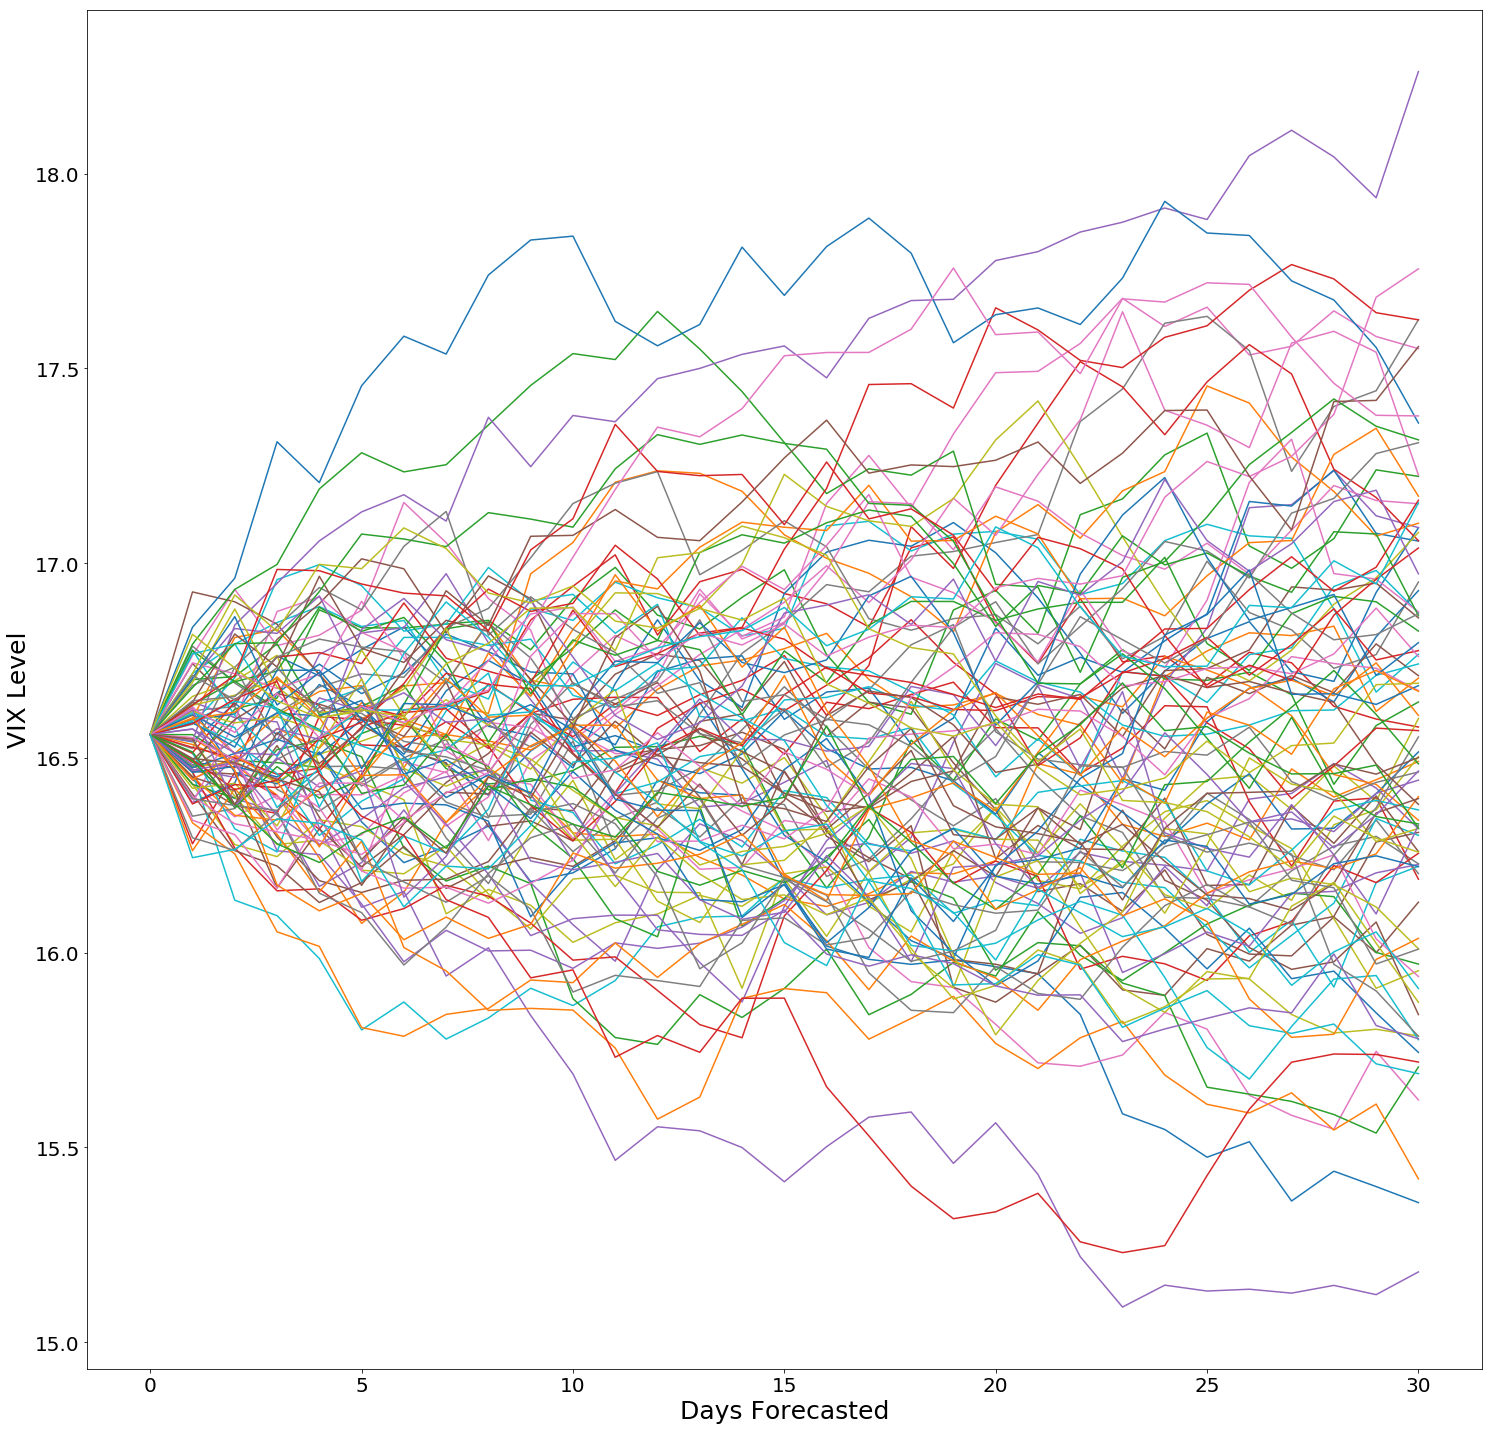

In [95]:
plt.figure(figsize = (25,25))
plt.xlabel("Days Forecasted", fontsize = 25)    
plt.ylabel("VIX Level", fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
for i in range(100):
    plt.plot(pr2.loc[:, i])
plt.savefig("mcreal1")

In [68]:
# Hypothetically, let's price an at-the-money put and call.
K = float(a.values)
v = []
pr3= pr2.tail(1).values

for i in range(len(pr2.tail(1).columns)):    
    if pr3[0,i] > K:
        v.append(pr3[0,i]-K)
    if pr3[0,i] <= K:
        v.append(0)
fv = sum(v)/len(v)
pv = fv*np.exp(-0.04*(30/252))
print("Current call price for at-the-money option is:", pv)

Current call price for at-the-money option is: 0.223549496542183


In [69]:
K = float(a.values)
v = []
pr3= pr2.tail(1).values
for i in range(len(pr2.tail(1).columns)):    
    if pr3[0,i] < K:
        v.append(-pr3[0,i]+K)
    if pr3[0,i] >= K:
        v.append(0)
fv = sum(v)/len(v)
pv = fv*np.exp(-0.04*(30/252))
print("Current put price for at-the-money option is:", pv)

Current put price for at-the-money option is: 0.23183123924695773
